In [ ]:
pip install pydriller


In [ ]:
pip install transformers torch


In [ ]:
from pydriller import Repository
import csv

with open("commits.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Hash", "Message", "ParentHashes", "IsMerge", "ModifiedFiles"])

    for commit in Repository("https://github.com/pallets/flask.git").traverse_commits():
        if "fix" in commit.msg.lower() or "bug" in commit.msg.lower():
            writer.writerow([
                commit.hash,
                commit.msg,
                commit.parents,
                commit.merge,
                [mod.new_path for mod in commit.modified_files]
            ])


In [ ]:
!pip install pydriller transformers torch pandas matplotlib


In [ ]:
from pydriller import Repository

# Fetch just 1 commit from Flask repo to test
for commit in Repository("https://github.com/pallets/flask").traverse_commits():
    print("Commit Hash:", commit.hash)
    print("Author:", commit.author.name)
    print("Date:", commit.author_date)
    print("Message:", commit.msg)
    break  # stop after first commit


Commit Hash: 33850c0ebd23ae615e6823993d441f46d80b1ff0
Author: Armin Ronacher
Date: 2010-04-06 13:12:57+02:00
Message: Initial checkin of stuff that exists so far.


In [ ]:
from pydriller import Repository
import pandas as pd

# Define keywords for identifying bug-fix commits
keywords = ["fix", "bug", "issue", "error", "resolve", "patch"]

data = []

# Traverse Flask repo commits
for commit in Repository("https://github.com/pallets/flask").traverse_commits():
    msg = commit.msg.lower()
    if any(kw in msg for kw in keywords):
        data.append({
            "Hash": commit.hash,
            "Message": commit.msg,
            "ParentHashes": commit.parents,
            "IsMerge": commit.merge,
            "ModifiedFiles": [mod.new_path for mod in commit.modified_files]
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("commits.csv", index=False)

# Show first few rows
df.head()


,Hash,Message,ParentHashes,IsMerge,ModifiedFiles
0,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,"Added docs, fixed some bugs I introduced last ...",[7d6b8e9ab3e738d69e39ad53a7c0f6a552d5284a],False,"[artwork/logo-full.svg, docs/_static/flask.png..."
1,8e9bd5f009bb8756a2a7d76a4b792323eeee49d6,Fixed a typo,[9dfab582d065521e9350327801ed2c5ced1c8fa1],False,[docs/index.rst]
2,1fff3e598126a084348ec2c112fdd3bc6b9a1ee0,Fixed a doc display bug and setup.py workaroun...,[05f36c7f7e2df36ee28f90d99632162579b1287c],False,"[docs/_themes/flasky/static/flasky.css_t, docs..."
3,574e81f9c8bbdc41958e1e7a7613633b091101f8,Fixed a bug in setup.py,[1fff3e598126a084348ec2c112fdd3bc6b9a1ee0],False,"[docs/quickstart.rst, setup.py]"
4,2f5a4f8dbc832b0daebcd66ea8b3969589191fa7,Doc updates and typo fixes,[03148dba6b26a2694da1d466584f50189c52e7b3],False,"[docs/testing.rst, examples/minitwit/README, e..."


In [ ]:
from pydriller import Repository
import pandas as pd

# Load commits we already identified
commits_df = pd.read_csv("commits.csv")

data = []
target_hashes = set(commits_df["Hash"].tolist())

for commit in Repository("https://github.com/pallets/flask").traverse_commits():
    if commit.hash in target_hashes:
        for mod in commit.modified_files:
            try:
                before = mod.source_code_before if mod.source_code_before else ""
            except Exception:
                before = ""
            try:
                after = mod.source_code if mod.source_code else ""
            except Exception:
                after = ""
            try:
                diff = mod.diff if mod.diff else ""
            except Exception:
                diff = ""

            data.append({
                "Hash": commit.hash,
                "Message": commit.msg,
                "Filename": mod.new_path,
                "SourceCode_Before": before,
                "SourceCode_After": after,
                "Diff": diff,
                "LLM_Inference": "",       # placeholder (Step 5)
                "Rectified_Message": ""    # placeholder (Step 5)
            })

df_diffs = pd.DataFrame(data)
df_diffs.to_csv("diffs.csv", index=False)
df_diffs.head()



,Hash,Message,Filename,SourceCode_Before,SourceCode_After,Diff,LLM_Inference,Rectified_Message
0,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,"Added docs, fixed some bugs I introduced last ...",artwork/logo-full.svg,,"<?xml version=""1.0"" encoding=""UTF-8"" standalon...","@@ -0,0 +1,329 @@\n+<?xml version=""1.0"" encodi...",,
1,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,"Added docs, fixed some bugs I introduced last ...",docs/_static/flask.png,,PNG\r\n\n   \rIHDR         n֕   sBIT|...,Binary files /dev/null and b/docs/_static/flas...,,
2,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,"Added docs, fixed some bugs I introduced last ...",docs/_static/logo-full.png,,PNG\r\n\n   \rIHDR        >j9   sBIT|...,Binary files /dev/null and b/docs/_static/logo...,,
3,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,"Added docs, fixed some bugs I introduced last ...",docs/_templates/sidebarintro.html,,<h3>About Flask</h3>\n<p>\n Flask is a micro ...,"@@ -0,0 +1,7 @@\n+<h3>About Flask</h3>\n+<p>\n...",,
4,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,"Added docs, fixed some bugs I introduced last ...",docs/_templates/sidebarlogo.html,,"<p class=""logo""><a href=""{{ pathto(master_doc)...","@@ -0,0 +1,3 @@\n+<p class=""logo""><a href=""{{ ...",,


In [ ]:
!pip install transformers torch --quiet


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load model + tokenizer
model_name = "mamiksik/CommitPredictorT5"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


In [ ]:
def generate_commit_message(diff, max_length=64):
    if diff is None or diff.strip() == "":
        return ""
    inputs = tokenizer(diff, return_tensors="pt", truncation=True, max_length=512)
    outputs = model.generate(**inputs, max_length=max_length, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)
import pandas as pd

# Load diffs
df_diffs = pd.read_csv("diffs.csv")

# Generate LLM predictions for each row
df_diffs["LLM_Inference"] = df_diffs["Diff"].apply(lambda d: generate_commit_message(str(d)))

# Save updated file
df_diffs.to_csv("diffs_with_llm.csv", index=False)

# Show first few rows
df_diffs[["Hash", "Filename", "Message", "LLM_Inference"]].head()


,Hash,Filename,Message,LLM_Inference
0,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,artwork/logo-full.svg,"Added docs, fixed some bugs I introduced last ...",add support for sodipodi inkscape
1,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_static/flask.png,"Added docs, fixed some bugs I introduced last ...",fix missing flask image
2,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_static/logo-full.png,"Added docs, fixed some bugs I introduced last ...",add missing logo file
3,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_templates/sidebarintro.html,"Added docs, fixed some bugs I introduced last ...",add a link to the list of missing app versions
4,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_templates/sidebarlogo.html,"Added docs, fixed some bugs I introduced last ...",add missing logo


In [ ]:
import pandas as pd

df = pd.read_csv("diffs_with_llm.csv")

def rectifier(dev_msg, llm_msg):
    # Rule 1: If dev message is too short/vague, use LLM
    if len(str(dev_msg).split()) < 3 and llm_msg.strip() != "":
        return llm_msg

    # Rule 2: If LLM is empty, fallback to developer
    if llm_msg.strip() == "":
        return dev_msg

    # Rule 3: If both are long enough, combine
    return dev_msg + " | Rectified: " + llm_msg

df["Rectified_Message"] = df.apply(lambda row: rectifier(row["Message"], row["LLM_Inference"]), axis=1)

# Save final dataset
df.to_csv("diffs_final.csv", index=False)

# Show preview
df[["Hash", "Filename", "Message", "LLM_Inference", "Rectified_Message"]].head()


,Hash,Filename,Message,LLM_Inference,Rectified_Message
0,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,artwork/logo-full.svg,"Added docs, fixed some bugs I introduced last ...",add support for sodipodi inkscape,"Added docs, fixed some bugs I introduced last ..."
1,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_static/flask.png,"Added docs, fixed some bugs I introduced last ...",fix missing flask image,"Added docs, fixed some bugs I introduced last ..."
2,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_static/logo-full.png,"Added docs, fixed some bugs I introduced last ...",add missing logo file,"Added docs, fixed some bugs I introduced last ..."
3,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_templates/sidebarintro.html,"Added docs, fixed some bugs I introduced last ...",add a link to the list of missing app versions,"Added docs, fixed some bugs I introduced last ..."
4,3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6,docs/_templates/sidebarlogo.html,"Added docs, fixed some bugs I introduced last ...",add missing logo,"Added docs, fixed some bugs I introduced last ..."


Precision Rates: {'Developer': np.float64(0.9983361064891847), 'LLM': np.float64(0.8810316139767055), 'Rectifier': np.float64(0.9933444259567388)}


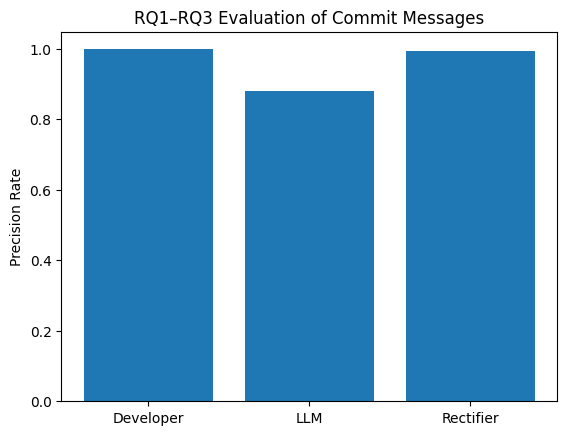

In [ ]:
import matplotlib.pyplot as plt

def is_precise(msg):
    if msg is None or str(msg).strip() == "":
        return False
    # Rule: at least 3 words OR mentions "function", "file", "error", "module"
    keywords = ["function", "file", "error", "fix", "module", "class"]
    return (len(msg.split()) >= 3) or any(kw in msg.lower() for kw in keywords)

df = pd.read_csv("diffs_final.csv")

# Evaluate precision
df["Dev_Precise"] = df["Message"].apply(is_precise)
df["LLM_Precise"] = df["LLM_Inference"].apply(is_precise)
df["Rectifier_Precise"] = df["Rectified_Message"].apply(is_precise)

# Count precision rates
precision_rates = {
    "Developer": df["Dev_Precise"].mean(),
    "LLM": df["LLM_Precise"].mean(),
    "Rectifier": df["Rectifier_Precise"].mean()
}

print("Precision Rates:", precision_rates)

# Plot results
plt.bar(precision_rates.keys(), precision_rates.values())
plt.ylabel("Precision Rate")
plt.title("RQ1–RQ3 Evaluation of Commit Messages")
plt.show()


#Task 3
